## Rubric

Instructions: DELETE this cell before you submit via a `git push` to your repo before deadline. This cell is for your reference only and is not needed in your report. 

Scoring: Out of 10 points

- Each Developing  => -2 pts
- Each Unsatisfactory/Missing => -4 pts
  - until the score is 

If students address the detailed feedback in a future checkpoint they will earn these points back


|                  | Unsatisfactory                                                                                                                                                                                                    | Developing                                                                                                                                                                                              | Proficient                                     | Excellent                                                                                                                              |
|------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|
| Data relevance   | Did not have data relevant to their question. Or the datasets don't work together because there is no way to line them up against each other. If there are multiple datasets, most of them have this trouble | Data was only tangentially relevant to the question or a bad proxy for the question. If there are multiple datasets, some of them may be irrelevant or can't be easily combined.                       | All data sources are relevant to the question. | Multiple data sources for each aspect of the project. It's clear how the data supports the needs of the project.                         |
| Data description | Dataset or its cleaning procedures are not described. If there are multiple datasets, most have this trouble                                                                                              | Data was not fully described. If there are multiple datasets, some of them are not fully described                                                                                                      | Data was fully described                       | The details of the data descriptions and perhaps some very basic EDA also make it clear how the data supports the needs of the project. |
| Data wrangling   | Did not obtain data. They did not clean/tidy the data they obtained.  If there are multiple datasets, most have this trouble                                                                                 | Data was partially cleaned or tidied. Perhaps you struggled to verify that the data was clean because they did not present it well. If there are multiple datasets, some have this trouble | The data is cleaned and tidied.                | The data is spotless and they used tools to visualize the data cleanliness and you were convinced at first glance                      |


# COGS 108 - Data Checkpoint

## Authors

Instructions: REPLACE the contents of this cell with your team list and their contributions. Note that this will change over the course of the checkpoints

This is a modified [CRediT taxonomy of contributions](https://credit.niso.org). For each group member please list how they contributed to this project using these terms:
> Analysis, Background research, Conceptualization, Data curation, Experimental investigation, Methodology, Project administration, Software, Visualization, Writing – original draft, Writing – review & editing

Example team list and credits:
- Alice Anderson: Conceptualization, Data curation, Methodology, Writing - original draft
- Bob Barker:  Analysis, Software, Visualization
- Charlie Chang: Project administration, Software, Writing - review & editing
- Dani Delgado: Analysis, Background research, Visualization, Writing - original draft

## Research Question

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback



## Background and Prior Work

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Hypothesis


Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback


## Data

### Data overview

Instructions: REPLACE the contents of this cell with descriptions of your actual datasets.

For each dataset include the following information
- Dataset #1
  - Dataset Name:
  - Link to the dataset:
  - Number of observations:
  - Number of variables:
  - Description of the variables most relevant to this project
  - Descriptions of any shortcomings this dataset has with repsect to the project
- Dataset #2 (if you have more than one!)
  - same as above
- etc

Each dataset deserves either a set of bullet points as above or a few sentences if you prefer that method.

If you plan to use multiple datasets, add a few sentences about how you plan to combine these datasets.

In [1]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

In [52]:
# Setup code -- this only needs to be run once after cloning the repo!
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
%pip install requests tqdm

import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries; 
# each dict has keys of 
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored 
datafiles = [
    { 'url': 'https://docs.google.com/spreadsheets/d/1XdAkvfhdPpZ37TaSrzX3EnFxgeB_LK_yvZ7Pp42epfA/export?format=csv', 'filename':'austin-texas-intakes-outcomes.csv'},
    { 'url': 'https://docs.google.com/spreadsheets/d/1uGCEULTyQrgffWznkxvEaH8wxoc2IjNR-RNCPwXcr_k/export?format=csv', 'filename':'sonoma-california-intake-outtakes.csv'}
]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')



Note: you may need to restart the kernel to use updated packages.


Overall Download Progress:  50%|█████     | 1/2 [00:08<00:08,  8.60s/it]

Successfully downloaded: austin-texas-intakes-outcomes.csv


Overall Download Progress: 100%|██████████| 2/2 [00:10<00:00,  5.48s/it]

Successfully downloaded: sonoma-california-intake-outtakes.csv


In [48]:
# packages our group needed to clean the data
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

### Dataset #1 

Instructions: 
1. Change the header from Dataset #1 to something more descriptive of the dataset
2. Write a few paragraphs about this dataset. Make sure to cover
   1. Describe the important metrics, what units they are in, and giv some sense of what they mean.  For example "Fasting blood glucose in units of mg glucose per deciliter of blood.  Normal values for healthy individuals range from 70 to 100 mg/dL.  Values 100-125 are prediabetic and values >125mg/dL indicate diabetes. Values <70 indicate hypoglycemia. Fasting idicates the patient hasn't eaten in the last 8 hours.  If blood glucose is >250 or <50 at any time (regardless of the time of last meal) the patient's life may be in immediate danger"
   2. If there are any major concerns with the dataset, describe them. For example "Dataset is composed of people who are serious enough about eating healthy that they voluntarily downloaded an app dedicated to tracking their eating patterns. This sample is likely biased because of that self-selection. These people own smartphones and may be healthier and may have more disposable income than the average person.  Those who voluntarily log conscientiously and for long amounts of time are also likely even more interested in health than those who download the app and only log a bit before getting tired of it"
3. Use the cell below to 
    1. load the dataset 
    2. make the dataset tidy or demonstrate that it was already tidy
    3. demonstrate the size of the dataset
    4. find out how much data is missing, where its missing, and if its missing at random or seems to have any systematic relationships in its missingness
    5. find and flag any outliers or suspicious entries
    6. clean the data or demonstrate that it was already clean.  You may choose how to deal with missingness (dropna of fillna... how='any' or 'all') and you should justify your choice in some way
    7. You will load raw data from `data/00-raw/`, you will (optionally) write intermediate stages of your work to `data/01-interim` and you will write the final fully wrangled version of your data to `data/02-processed`
4. Optionally you can also show some summary statistics for variables that you think are important to the project
5. Feel free to add more cells here if that's helpful for you


In [60]:
pd.crosstab(austin['outcome_type'],
            austin['outcome_subtype'].isna(),
            normalize='index')

outcome_subtype,False
outcome_type,
Adoption,1.0
Died,1.0
Disposal,1.0
Euthanasia,1.0
Missing,1.0
Relocate,1.0
Return to Owner,1.0
Rto-Adopt,1.0
Transfer,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_upon_outcome            79672 non-null  object 
 1   animal_id_outcome           79672 non-null  object 
 2   date_of_birth               79672 non-null  object 
 3   outcome_subtype             36348 non-null  object 
 4   outcome_type                79662 non-null  object 
 5   sex_upon_outcome            79671 non-null  object 
 6   age_upon_outcome_(days)     79672 non-null  int64  
 7   age_upon_outcome_(years)    79672 non-null  float64
 8   age_upon_outcome_age_group  79672 non-null  object 
 9   outcome_datetime            79672 non-null  object 
 10  outcome_month               79672 non-null  int64  
 11  outcome_year                79672 non-null  int64  
 12  outcome_monthyear           79672 non-null  object 
 13  outcome_weekday             796

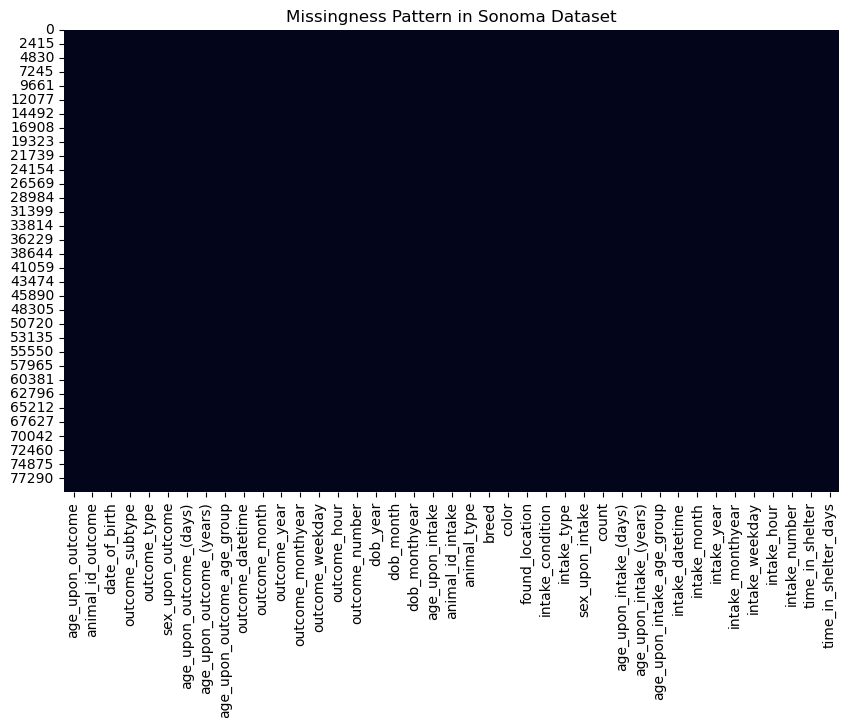

In [ ]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
austin = pd.read_csv('data/00-raw/austin-texas-intakes-outcomes.csv')

# the dataset appears tidy because each row represents a single intake/outcome event
# and each column represents a variable
pd.set_option('display.max_columns', None)
tidy = austin.info()

#size, the dataset contains 79,672 observations and 41 variables
size = austin.shape

# We on have missingness in 4 columns one is the outcome_subtype, outcome_type and sex_upon_outcome, sex_upon_intake
missing = austin.isna().sum()
# The percentage missing, the column that has the most missing at about 54% is outcome_subtype
# It is most likely that the missingness is not at random but is conditinally dependent to the outcome_type
# certain outcome types appear more likely to have missing subtypes (Return to Owner, Disposal etc)
# while other almost always have a subtype (Transfer), indicating the data is not MCAR
# instead the missingness appears conditional to the outcome type MAR.
# crosstabulation confirmed that certain outcome categories rarely require subtype
percent = austin.isna().mean() * 100
missing_subtype = pd.crosstab(austin['outcome_type'], austin['outcome_subtype'].isna(), normalize='index')

# Clean data, I will be cleaning the outcome_subtype adding not applicable because some outcome subtypes 
# dont need to be filled in because of the outcome_type
mask = austin['outcome_subtype'].isna()
austin.loc[mask, 'outcome_subtype'] = 'Not Applicable'
# Convert columns to datetime
austin['date_of_birth'] = pd.to_datetime(austin['date_of_birth'], errors='coerce')
austin['outcome_datetime'] = pd.to_datetime(austin['outcome_datetime'])
austin['intake_datetime'] = pd.to_datetime(austin['intake_datetime'])
# I dropped 10 rows that didnt have outcome_type because this variable is central to our analysis
austin = austin.dropna(subset=['outcome_type'])
# Fill the single sex value with Unknown
austin['sex_upon_outcome'] = austin['sex_upon_outcome'].fillna('Unknown')
austin['sex_upon_intake'] = austin['sex_upon_intake'].fillna('Unknown')

# save this version
os.makedirs('data/02-processed', exist_ok=True)
austin.to_csv('data/02-processed/austin_clean.csv', index=False)

# Missingness Heatmap, the heat map is mostly blank due to the fact that the data is cleaner
plt.figure(figsize=(10,6))
sns.heatmap(austin.isna(), cbar=False)
plt.title("Missingness Pattern in Austin Dataset")
plt.show()

### Dataset #2 

See instructions above for Dataset #1.  Feel free to keep adding as many more datasets as you need.  Put each new dataset in its own section just like these. 

Lastly if you do have multiple datasets, add another section where you demonstrate how you will join, align, cross-reference or whatever to combine data from the different datasets

Please note that you can always keep adding more datasets in the future if these datasets you turn in for the checkpoint aren't sufficient.  The goal here is demonstrate that you can obtain and wrangle data.  You are not tied down to only use what you turn in right now.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32601 entries, 0 to 32600
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  24064 non-null  object 
 1   Type                  32601 non-null  object 
 2   Breed                 32601 non-null  object 
 3   Color                 32601 non-null  object 
 4   Sex                   32601 non-null  object 
 5   Size                  32564 non-null  object 
 6   Date Of Birth         24803 non-null  object 
 7   Impound Number        32601 non-null  object 
 8   Kennel Number         32593 non-null  object 
 9   Animal ID             32601 non-null  object 
 10  Intake Date           32601 non-null  object 
 11  Outcome Date          32423 non-null  object 
 12  Days in Shelter       32601 non-null  object 
 13  Intake Type           32601 non-null  object 
 14  Intake Subtype        32601 non-null  object 
 15  Outcome Type       

C:\Users\vanem\AppData\Local\Temp\ipykernel_27828\3022081328.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonoma['Name'] = sonoma['Name'].fillna('Unknown')
C:\Users\vanem\AppData\Local\Temp\ipykernel_27828\3022081328.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonoma['Outcome Zip Code'] = sonoma['Outcome Zip Code'].fillna(-1)
C:\Users\vanem\AppData\Local\Temp\ipykernel_27828\3022081328.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

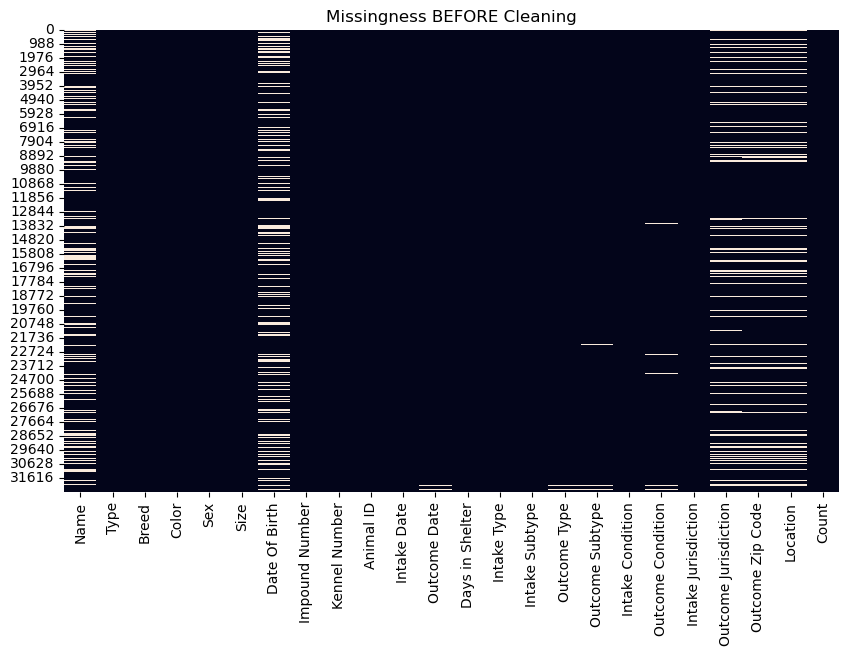

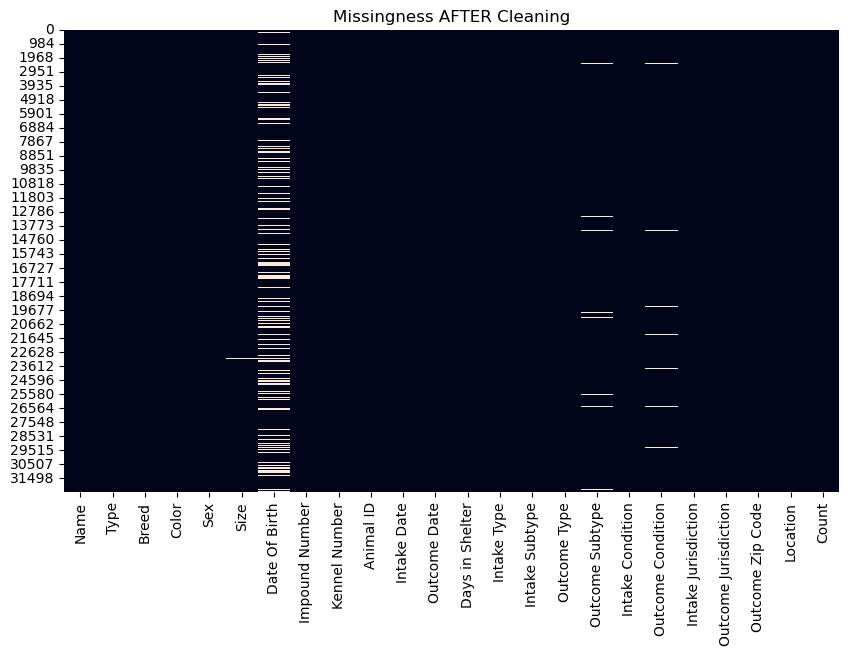

In [ ]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
sonoma = pd.read_csv('data/00-raw/sonoma-california-intake-outtakes.csv')
original_sonoma = sonoma

# the dataset appears tidy because each row represents a single impound/outcome record
# and each column represents a variable, and no columns containing multiple variables
pd.set_option('display.max_columns', None)
tidy = sonoma.info()

#size, the dataset contains 36,601 observations and 24 variables
size = sonoma.shape

# missingness overview
# some of the larger missingness are Outcome Jurisdiction ~14%, Outcome Zip Code ~14%, Location ~14%
# Name 26% and Date of Birth ~24%
# some of the smaller missingness are Ourcome Condition ~1.7%, Outcome Subtype ~1.6%, Outcome Type ~0.6%
# and Outcome Date 0.5%
# Name: the missingness is very structural, many animals that arrive in the shelter are unnamed, it is not a randon error
# Date of Birth: it is also like name that it is hard to find out the extact DOB so they just estimate ages instead
missing = (sonoma.isna().mean() * 100).sort_values(ascending=False)
# Zip Code / Jurisdiction / Location is strongly associated with Outcome Type
# when animals leave to a person(adoption/return), zip code is recorded
# when animal dies or is euthinized, zip code is mostly irrelevant so left blank
# and if we dont have a zip code then we most definetly dont have a location/jurisdiction
# if an animal dies in shelter, there is no 'new' location
# same with jurisdiction, there is not 'new' jurisdiction if an animal is euthanized or died
# that is why they are all about ~14% missing
# I used this to see missingness pattern
zip_missing = pd.crosstab(sonoma['Outcome Type'], sonoma['Outcome Zip Code'].isna(), normalize='index')
location_missing = pd.crosstab(sonoma['Outcome Type'], sonoma['Location'].isna(), normalize='index')
juri_missing = pd.crosstab(sonoma['Outcome Type'], sonoma['Outcome Jurisdiction'].isna(), normalize='index')


# Clean Data
# Convert coluns to datetime
sonoma['Intake Date'] = pd.to_datetime(sonoma['Intake Date'])
sonoma['Outcome Date'] = pd.to_datetime(sonoma['Outcome Date'])
sonoma['Days in Shelter'] = pd.to_numeric(sonoma['Days in Shelter'], errors='coerce')
# to check for suspision entries i used .describe() and also for Logical Errors
suspicious = sonoma['Days in Shelter'].describe()
# Negative shelter days?
negative_days = (sonoma['Days in Shelter'] < 0).sum()
# Outcome date before intake date?
outcome_date = (sonoma['Outcome Date'] < sonoma['Intake Date']).sum()
# i dropped rows missing core outcome information, these variables are central to outcome analysis 
# and represent a small fraction of the dataset
sonoma = sonoma.dropna(subset=['Outcome Type', 'Outcome Date'])
# handle name missingness, missing names likely indicate unnamed animals rather than data error
# therefore it is better to lable them as 'Unknown
sonoma['Name'] = sonoma['Name'].fillna('Unknown')
# fill zip code with -1 to show it is not applicable
sonoma['Outcome Zip Code'] = sonoma['Outcome Zip Code'].fillna(-1)
sonoma['Outcome Jurisdiction'] = sonoma['Outcome Jurisdiction'].fillna('Not Applicable')
sonoma['Location'] = sonoma['Location'].fillna('Not Recorded')
# did not want to drop the DOB so instead i converted it to datetime and left it NaT
sonoma['Date Of Birth'] = pd.to_datetime(sonoma['Date Of Birth'], errors='coerce')

# save this version
os.makedirs('data/02-processed', exist_ok=True)
sonoma.to_csv('data/02-processed/sonoma_clean.csv', index=False)

# Missingness Heatmap, as you can see some part of DOB is still missing we dont want to remove those 
# since the missingness is structural and reflects unknown birth dates rather than entry error
plt.figure(figsize=(10,6))
sns.heatmap(original_sonoma.isna(), cbar=False)
plt.title("Missingness BEFORE Cleaning")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(sonoma.isna(), cbar=False)
plt.title("Missingness AFTER Cleaning")
plt.show()

## Ethics

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Team Expectations 

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback


## Project Timeline Proposal

Instructions: Replace this with your timeline.  **PLEASE UPDATE your Timeline!** No battle plan survives contact with the enemy, so make sure we understand how your plans have changed.  Also if you have lost points on the previous checkpoint fix them